# Model 3 Final Project

Please fill out:
* Student name: Asad Rahman

* Student pace: full time
* Scheduled project review date/time: 6 /14 /19
* Instructor name: Victor Geislinger
* Blog post URL: 


[1. Introduction](#Introduction)

[2. Obtaining data](#Obtaining-the-data)

[3. Scrubbing](#Scrubbing-the-data)

[4. Exploring](#Exploring-data)

[5. Modeling](#Modeling-data)

# Introduction

###### Dataset

The dataset is a sample of the transactions made in a retail store. It has about 550,000 observations.

# Obtaining the data

In this section, the data and the required libraries will be imported.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#import dataset
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Scrubbing the data

In this section the data will be cleaned and pre-processed in order to allow for exploratory data analysis and modeling.

**Inspecting and dropping columns**

In [4]:
#Checking and dropping columns
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

**User_ID**: ID of the customer.

**Product_ID**: ID of the product.

**Gender**: gender of the customer making the purchase

**Age**: Age group of the customer making the purchase

**Occupation**: Occupation of the customer, categorized into numerical representations from 1-20.

**City_Category**: Customer's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.

**Stay_In_Current_City_Years**: Indicates how long the customer has lived in this city.

**Marital_Status**: is 0 if the customer is not married and 1 otherwise.

**Product_Category_1 to _3**: Category of the product. categorized as '1','2', or '3'.

**Purchase**: Purchase amount.


In [5]:
#Checking column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

There are some null values in product category 2 and 3, those will be dealt with later.

**User_ID**

In [7]:
print(f"Of the {len(df.User_ID)} instances of purchases, {df.User_ID.nunique()} are unique. This means there are {df.User_ID.nunique()} unique customers") 

Of the 537577 instances of purchases, 5891 are unique. This means there are 5891 unique customers


In [8]:
df.User_ID.value_counts()

1001680    1025
1004277     978
1001941     898
1001181     861
1000889     822
1003618     766
1001150     752
1001015     739
1002909     717
1001449     714
1002063     708
1004344     705
1003391     697
1003841     697
1000424     694
1004510     690
1001980     684
1005795     680
1001088     679
1004227     676
1003808     670
1005831     667
1004508     651
1000549     631
1003224     622
1003539     616
1001285     605
1004543     587
1003824     583
1001010     575
           ... 
1004176       8
1005117       8
1004992       8
1004464       8
1001318       8
1002037       8
1002488       8
1002965       8
1004192       8
1005804       8
1004527       8
1000320       8
1003739       8
1005043       8
1003883       8
1000947       8
1005174       8
1000094       7
1002690       7
1003275       7
1005904       7
1003291       7
1003542       7
1002135       7
1004991       6
1005810       6
1005391       6
1005608       6
1002111       6
1000708       5
Name: User_ID, Length: 5

**Product_ID**

In [9]:
print(f"Of the {len(df.Product_ID)} products sold, {df.Product_ID.nunique()} are unique. This means there are {df.Product_ID.nunique()} unique products sold at the store") 

Of the 537577 products sold, 3623 are unique. This means there are 3623 unique products sold at the store


In [10]:
df.Product_ID.value_counts()

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00145042    1384
P00059442    1384
P00237542    1374
P00255842    1354
P00117942    1346
P00110942    1336
P00010742    1331
P00110842    1260
P00220442    1253
P00051442    1233
P00102642    1228
P00117442    1227
P00278642    1213
P00242742    1194
P00034742    1188
P00080342    1186
P00148642    1179
P00028842    1172
P00031042    1168
P00251242    1167
P00114942    1162
P00270942    1141
             ... 
P00204442       1
P00295642       1
P00299342       1
P00329042       1
P00062342       1
P00315142       1
P00314742       1
P00065142       1
P00260742       1
P00077242       1
P00012342       1
P00364542       1
P00065542       1
P00215142       1
P00291642       1
P00012942       1
P00013842       1
P00054442       1
P00164242       1
P00107842       1
P00167342       1
P00298842       1
P00156642       1
P00080442       1
P00312542 

**Gender**

In [11]:
df.Gender.value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

There is an unequal distribution between purchases made by male and females

**Age**

In [12]:
df.Age.value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

The ages in this dataset are grouped at around 10 year increments, with 0-17 year olds and 55+ having an all encompassing category.

**Occupation**

In [13]:
df.Occupation.value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

Although labeled as int type, these numbers are categorical -- representing different occupations

**City_Category**

In [14]:
df.City_Category.value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

Could be descriptive of socioeconomic state of the city -- upper, middle, lower class.

**Stay_In_Current_City_Years**

In [15]:
df.Stay_In_Current_City_Years.value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

**Marital_Status**

In [16]:
df.Marital_Status.value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

**Product_Category_1** , **Product_Category_2** , **Product_Category_3**

In [17]:
df.Product_Category_1.value_counts()

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

In [18]:
display(df.Product_Category_2.value_counts())
print(f"{(df.Product_Category_2.isnull().sum() / len(df.Product_Category_2)) * 100} percent of this feature is null")

8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0      5591
12.0     5419
10.0     2991
3.0      2835
18.0     2730
7.0       615
Name: Product_Category_2, dtype: int64

31.06271287648095 percent of this feature is null


In [19]:
display(df.Product_Category_3.value_counts())
print(f"{(df.Product_Category_3.isnull().sum() / len(df.Product_Category_3)) * 100} percent of this feature is null")

16.0    32148
15.0    27611
14.0    18121
17.0    16449
5.0     16380
8.0     12384
9.0     11414
12.0     9094
13.0     5385
6.0      4818
18.0     4563
4.0      1840
11.0     1773
10.0     1698
3.0       600
Name: Product_Category_3, dtype: int64

69.44102891306734 percent of this feature is null


Product categories 2 and 3 are missing almost 1/3 and 2/3 of their data, respectivley. Because these features contain numbers that represent categories, we filled the nan values with "0" to represent "no category"

In [20]:
df.fillna(0,inplace=True)

**Purchase**

In [21]:
df.Purchase.value_counts()

6855     186
7011     185
7193     182
6891     182
6879     181
7027     180
7012     180
6883     179
7166     179
7165     179
6960     178
6868     176
7089     176
7093     176
6923     176
6858     176
7167     175
7114     175
7185     174
6931     174
7060     174
6928     174
6973     173
6904     173
7146     173
7047     173
7108     172
7034     171
6908     171
7010     171
        ... 
14891      1
21279      1
2686       1
21486      1
14968      1
10362      1
23856      1
14456      1
20974      1
18550      1
14609      1
5678       1
23481      1
23669      1
14568      1
6781       1
4732       1
4921       1
14969      1
17203      1
17014      1
23157      1
21108      1
14890      1
23344      1
18719      1
898        1
14457      1
13947      1
3326       1
Name: Purchase, Length: 17959, dtype: int64

# Exploring data

In this section, exploratory data analysis will be conducted, in order to explore the data and draw useful insights.

**Key Statistics**

In [22]:
#Summary statistics for the numerical features
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [23]:
cat_describe = df[['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status']].astype('object').describe()
cat_describe.loc['percent'] = 100*cat_describe.loc['freq'] / cat_describe.loc['count']
display(cat_describe)

,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status
count,537577,537577,537577,537577.00000,537577,537577.000000
unique,3623,2,7,21.00000,3,2.000000
top,P00265242,M,26-35,4.00000,B,0.000000
freq,1858,405380,214690,70862.00000,226493,317817.000000
percent,0.345625,75.4087,39.9366,13.18174,42.1322,59.120275


Average spending at the store seems to be about 9,333 units of currency, though we aren't sure if this is in USD or another form of currency.

**Gender**

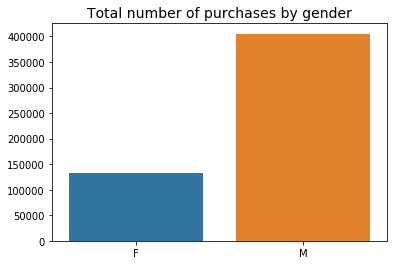

In [24]:
gender_gb = df[['Gender', 'Purchase']].groupby('Gender', as_index=False).agg('count')
sns.barplot(x='Gender', y='Purchase', data=gender_gb)
plt.ylabel('')
plt.xlabel('')
plt.title('Total number of purchases by gender', size=14)
plt.show()

The amount of male customers is nearly triple the amount of female customers.

**Age**

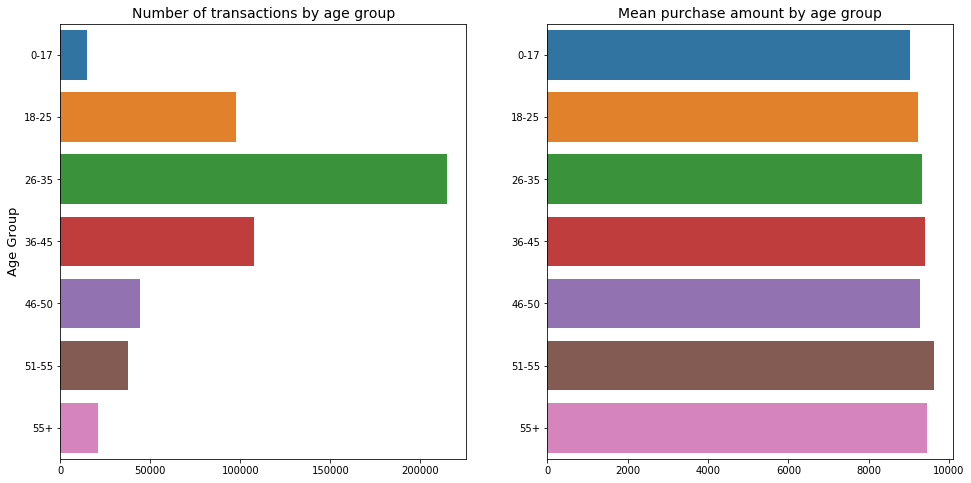

In [25]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.countplot(y='Age', data=df, order=sorted(df.Age.unique()))
plt.title('Number of transactions by age group', size=14)
plt.xlabel('')
plt.ylabel('Age Group', size=13)
plt.subplot(122)
age_gb = df[['Age', 'Purchase']].groupby('Age', as_index=False).agg('mean')
sns.barplot(y='Age', x='Purchase', data=age_gb, order=sorted(df.Age.unique()))
plt.title('Mean purchase amount by age group', size=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

Customers of 26 to 35 years of age beats out any other age group almost 2 fold in number of transactions. Each age group also spends about the same on average.

**Occupation**

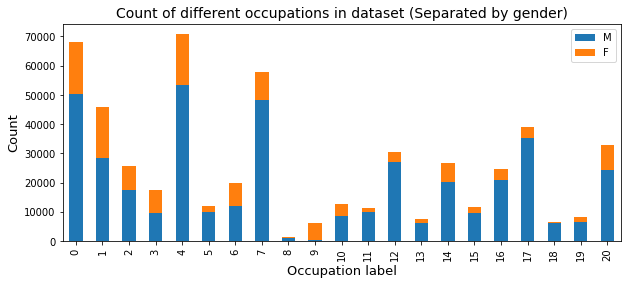

In [26]:
men = df[df.Gender == 'M']['Occupation'].value_counts(sort=False)
women = df[df.Gender == 'F']['Occupation'].value_counts(sort=False)
pd.DataFrame({'M': men, 'F': women}, index=range(0,21)).plot.bar(stacked=True)
plt.gcf().set_size_inches(10, 4)
plt.title("Count of different occupations in dataset (Separated by gender)", size=14)
plt.legend(loc="upper right")
plt.xlabel('Occupation label', size=13)
plt.ylabel('Count', size=13)
plt.show()

Each customers occupation was masked by a representative number, but occupations 4,0, and 7 seem to represent the greatest amount of customers.

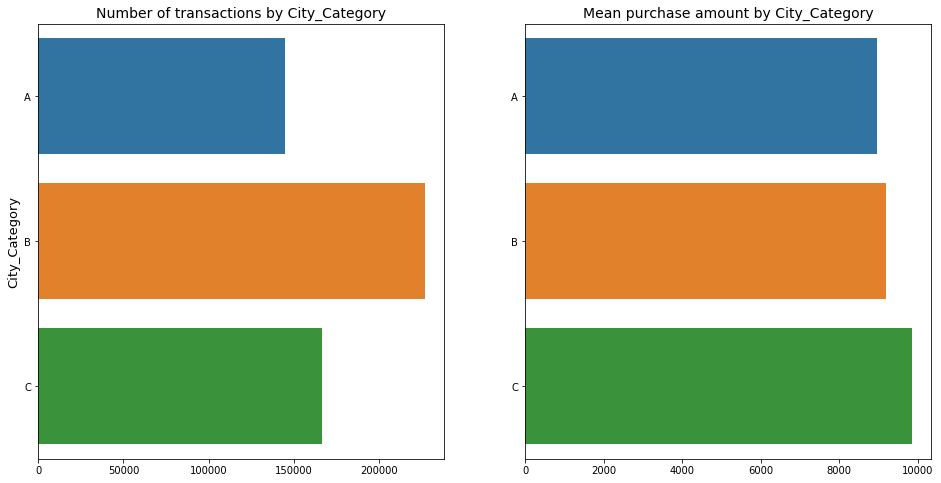

In [27]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.countplot(y='City_Category', data=df, order=sorted(df.City_Category.unique()))
plt.title('Number of transactions by City_Category', size=14)
plt.xlabel('')
plt.ylabel('City_Category', size=13)
plt.subplot(122)
age_gb = df[['City_Category', 'Purchase']].groupby('City_Category', as_index=False).agg('mean')
sns.barplot(y='City_Category', x='Purchase', data=age_gb, order=sorted(df.City_Category.unique()))
plt.title('Mean purchase amount by City_Category', size=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

# Modeling data

*Decision tree*

We decided to go with a supervised decision tree to classify our customers Gender. This information can be monopolized on considering one demographic makes a majority of our sales (males).

We start by encoding our features as numbers.Label encoding is used on our binary features, and one hot encoding on the other features.

In [28]:
lb = LabelEncoder()
df['User_ID'] = lb.fit_transform(df['User_ID'])
df['Product_ID'] = lb.fit_transform(df['Product_ID'])
df['Gender'] = np.where(df['Gender']=='M',1,0) # Female: 0, Male: 1
df_Age = pd.get_dummies(df.Age)
df_CC = pd.get_dummies(df.City_Category)
df_SIC = pd.get_dummies(df.Stay_In_Current_City_Years)
df_encoded = pd.concat([df,df_Age,df_CC,df_SIC],axis=1)
df_encoded.drop(['Age','City_Category','Stay_In_Current_City_Years'],axis=1,inplace=True)

In [29]:
df_encoded.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Occupation', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+',
       'A', 'B', 'C', '0', '1', '2', '3', '4+'],
      dtype='object')

In [30]:
X = df_encoded.drop(['Gender'], axis=1)
y = df_encoded['Gender']

We set our predictive features and Gender feature to X and y respectivley to be tested and trained off our model.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 123)

In [32]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [33]:
# Make predictions for test data
y_pred = classifier.predict(X_test)  

In [34]:
# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :99.84746456341381

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,26360,83,26443
1,81,80992,81073
All,26441,81075,107516


Our model shows us a success rate of predictive gender as 99%